In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 4,3

In [2]:
dataset = pd.read_csv('/home/simriti/Desktop/humidity_forecast.csv')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['DATE'])

In [3]:
from datetime import datetime
print(indexedDataset.tail(5))

              hum
DATE             
2011-08-01  70.27
2011-09-01  75.16
2011-10-01  71.15
2011-11-01  58.94
2011-12-01  66.80


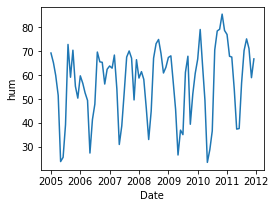

In [4]:
from datetime import datetime
plt.xlabel('Date')
plt.ylabel('hum')
plt.plot(indexedDataset)

In [5]:
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean,rolstd)

                  hum
DATE                 
2005-01-01        NaN
2005-02-01        NaN
2005-03-01        NaN
2005-04-01        NaN
2005-05-01        NaN
...               ...
2011-08-01  65.870000
2011-09-01  65.593333
2011-10-01  64.921667
2011-11-01  62.706667
2011-12-01  61.716667

[84 rows x 1 columns]                   hum
DATE                 
2005-01-01        NaN
2005-02-01        NaN
2005-03-01        NaN
2005-04-01        NaN
2005-05-01        NaN
...               ...
2011-08-01  16.142504
2011-09-01  15.933836
2011-10-01  15.470816
2011-11-01  14.095202
2011-12-01  13.263993

[84 rows x 1 columns]


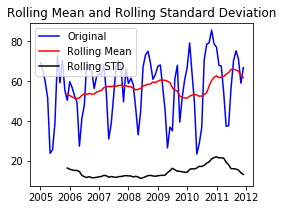

In [6]:
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean_ = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black' , label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.show(block = False)

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dicky-Fuller test: ')
dftest = adfuller(indexedDataset['hum'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statitics','p-value','#Lag value','no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value
    
print(dfoutput)

Results of Dicky-Fuller test: 
Test Statitics              -2.133024
p-value                      0.231444
#Lag value                  12.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


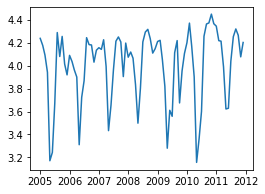

In [9]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

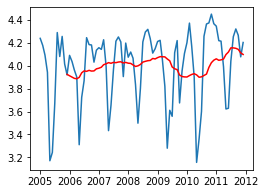

In [10]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window = 12 ).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [11]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(15)

,hum
DATE,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
2005-06-01,NaN
2005-07-01,NaN
2005-08-01,NaN
2005-09-01,NaN


In [12]:
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
print(datasetLogScaleMinusMovingAverage.head(5))

                 hum
DATE                
2005-12-01 -0.004507
2006-01-01  0.177750
2006-02-01  0.135485
2006-03-01  0.074207
2006-04-01  0.014739


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean_ = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black' , label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    plt.show(block = False)
    
    #Perform Dicky-Fuller test
    print('Results of Dicky-Fuller test: ')
    dftest = adfuller(timeseries['hum'], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statitics','p-value','#Lag value','no. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value

    print(dfoutput)


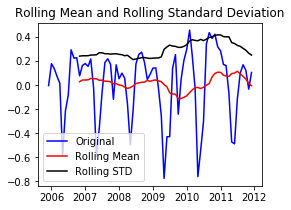

Results of Dicky-Fuller test: 
Test Statitics              -2.260576
p-value                      0.184998
#Lag value                  12.000000
no. of observations used    60.000000
Critical value (1%)         -3.544369
Critical value (5%)         -2.911073
Critical value (10%)        -2.593190
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)

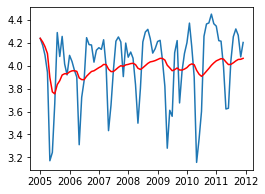

In [15]:
expotentialDecayWeightAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(expotentialDecayWeightAverage, color = 'red')

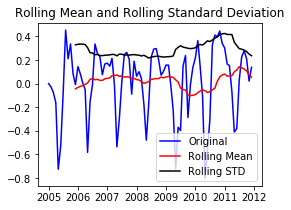

Results of Dicky-Fuller test: 
Test Statitics              -2.191328
p-value                      0.209408
#Lag value                  12.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


In [16]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale - expotentialDecayWeightAverage
datasetLogScaleMinusMovingExponentDecayAverage.dropna(inplace = True)
test_stationarity(datasetLogScaleMinusMovingExponentDecayAverage)

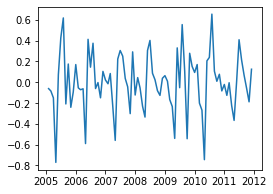

In [17]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

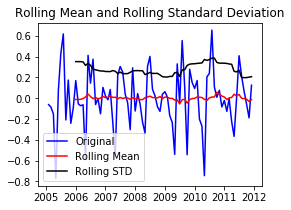

Results of Dicky-Fuller test: 
Test Statitics              -3.684346
p-value                      0.004339
#Lag value                  11.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

In [19]:
indexedDataset_logScale

,hum
DATE,
2005-01-01,4.237723
2005-02-01,4.176539
2005-03-01,4.092176
2005-04-01,3.941970
2005-05-01,3.171365
...,...
2011-08-01,4.252345
2011-09-01,4.319619
2011-10-01,4.264790


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
decomposition = seasonal_decompose(indexedDataset_logScale,freq=30)

/home/simriti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


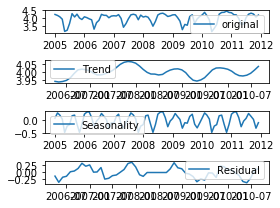

In [22]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.tight_layout()

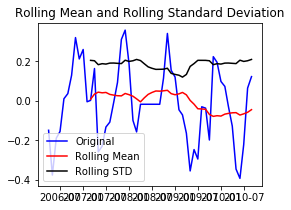

Results of Dicky-Fuller test: 


KeyError: 'hum'

In [23]:
decomposeLogData = residual
decomposeLogData.dropna(inplace = True)
test_stationarity(decomposeLogData)

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrelation Function')

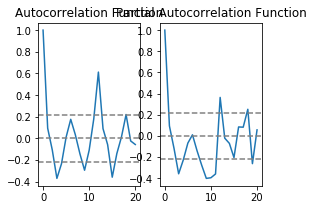

In [24]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0 , linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.title('Autocorrelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0 , linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.title('Partial Autocorrelation Function')


/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


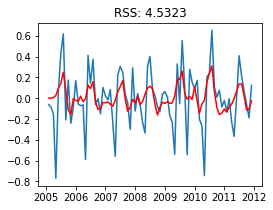

In [25]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (0,1,4))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting AR Model')


/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


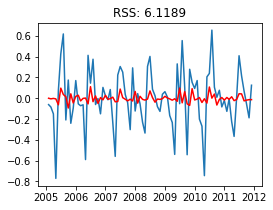

In [27]:
model = ARIMA(indexedDataset_logScale, order= (2,1,0))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting MA Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


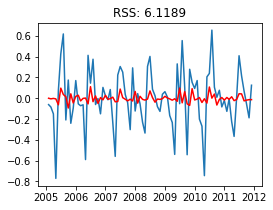

In [28]:
model = ARIMA(indexedDataset_logScale, order= (2,1,0))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting MA Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


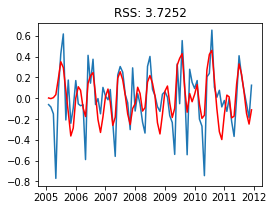

In [29]:
model = ARIMA(indexedDataset_logScale, order= (2,1,4))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting ARIMA Model')

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())




#convert to cummulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
2005-02-01    0.002306
2005-03-01   -0.003501
2005-04-01    0.005723
2005-05-01    0.034502
2005-06-01    0.189800
dtype: float64
DATE
2005-02-01    0.002306
2005-03-01   -0.001194
2005-04-01    0.004529
2005-05-01    0.039031
2005-06-01    0.228830
dtype: float64


/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


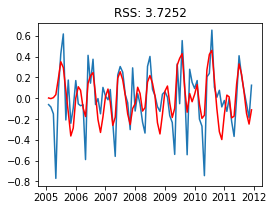

In [32]:
model = ARIMA(indexedDataset_logScale, order= (2,1,4))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting ARIMA Model')

In [33]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['hum'], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head(5)

DATE
2005-01-01    4.237723
2005-02-01    4.178845
2005-03-01    4.090981
2005-04-01    3.946499
2005-05-01    3.210396
dtype: float64

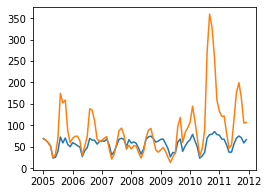

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

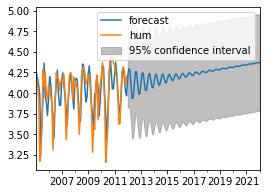

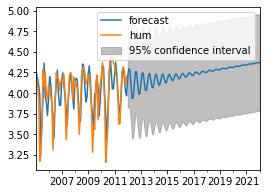

In [35]:
results_ARIMA.plot_predict(1,204)

In [36]:
results_ARIMA.forecast(steps=120)

(array([4.19809235, 4.29363227, 4.27890117, 4.09588985, 3.93269062,
        3.94381092, 4.1071284 , 4.25874632, 4.25878559, 4.12139258,
        3.98919613, 3.98862493, 4.11196451, 4.23525959, 4.24441708,
        4.14201834, 4.03564146, 4.02809326, 4.12083709, 4.22064165,
        4.23500329, 4.15932238, 4.07427679, 4.062984  , 4.13242522,
        4.21289376, 4.22980622, 4.17442351, 4.1068756 , 4.09400094,
        4.14578407, 4.21044407, 4.228159  , 4.18811702, 4.13482951,
        4.12177247, 4.16024665, 4.21206185, 4.22947243, 4.20096005,
        4.15922577, 4.14684863, 4.17534965, 4.21678762, 4.23323499,
        4.21333595, 4.18091019, 4.16970345, 4.19077773, 4.22387661,
        4.23900884, 4.22550237, 4.20053785, 4.19074015, 4.206322  ,
        4.23275326, 4.24642359, 4.23762713, 4.21861388, 4.21029813,
        4.22184914, 4.24297475, 4.25516901, 4.24981465, 4.23552601,
        4.22866032, 4.23727881, 4.25420198, 4.26498754, 4.26212533,
        4.25157048, 4.24606076, 4.25256705, 4.26